<a href="https://colab.research.google.com/github/annisaeka123/PCVK-_Semester-5/blob/main/week11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Annisa Eka Puspita

Kelas: TI-3H

Absen: 02

NIM: 2341720131

-----------------------------------------------------------------------------------



**MODUL 11 DASAR-DASAR DETEKSI OBYEK**

**D. TUGAS PRAKTIKUM**

--------------------------------

D1. Praktikum Deteksi Obyek Dasar

In [1]:
!apt-get update -qq
!apt-get install -y -qq libopencv-dev python3-opencv
!pip install -q opencv-python-headless>=4.9.0.80 matplotlib numpy

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%
Selecting previously unselected package libatspi2.0-0:amd64.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../00-libatspi2.0-0_2.44.0-3_amd64.deb ...
Unpacking libatspi2.0-0:amd64 (2.44.0-3) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../01-libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package session-migration.
Preparing to unpack .../02-session-migration_0.3.6_amd64.deb ...
Unpacking session-migration (0.3.6) ...
Selecting previously unselected package gsettings-desktop-schemas.
Preparing to unpack .../03-gsettings-desktop-schemas_42.0-1ubuntu1_all.deb ...
Unpacking gsettings-desktop-schemas (42.0-1ubu

In [2]:
!pip install -U numpy==2.0.1 opencv-python-headless==4.10.0.84 pillow==11.0.0 matplotlib==3.9.2 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 64.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2, numpy as np, matplotlib.pyplot as plt

BASE = "/content/drive/MyDrive/PCVK/Images/Object Detection/"

1. Template matching — 6 metode OpenCV

Gunakan cv2.matchTemplate dengan metode:

TM_SQDIFF, TM_SQDIFF_NORMED, TM_CCORR, TM_CCORR_NORMED, TM_CCOEFF, TM_CCOEFF_NORMED.

In [5]:
# === Path ke folder gambar ===
img_path = BASE + "cats_and_bunnies.jpg"
tpl_path = BASE + "cat2_template.jpg"


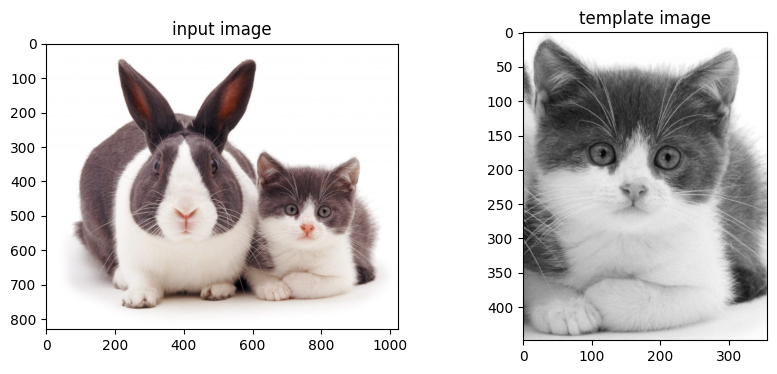

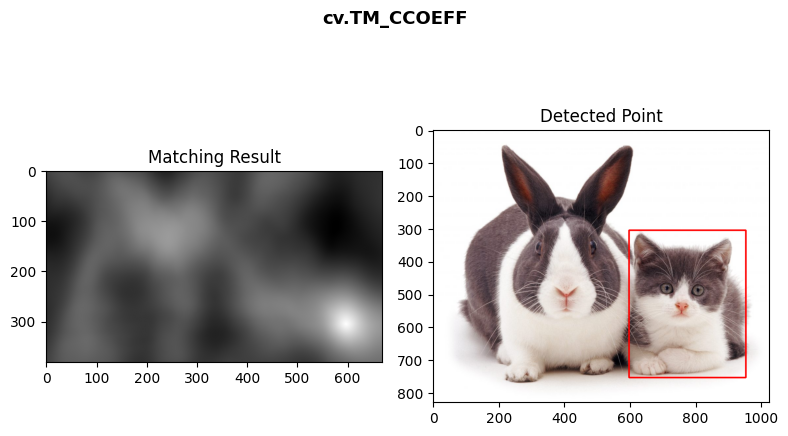

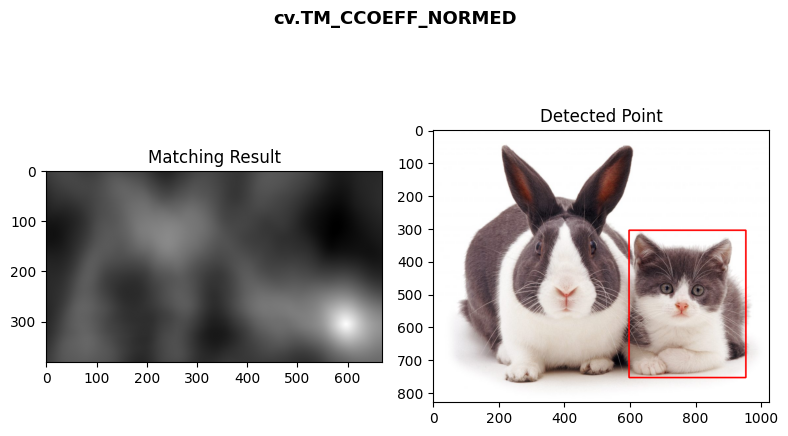

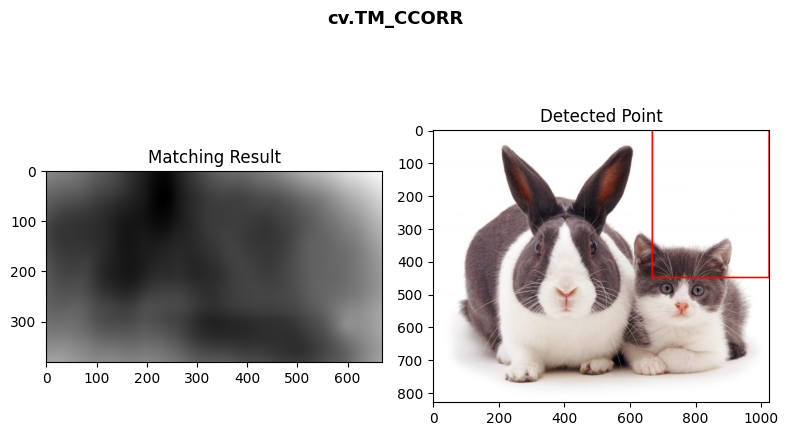

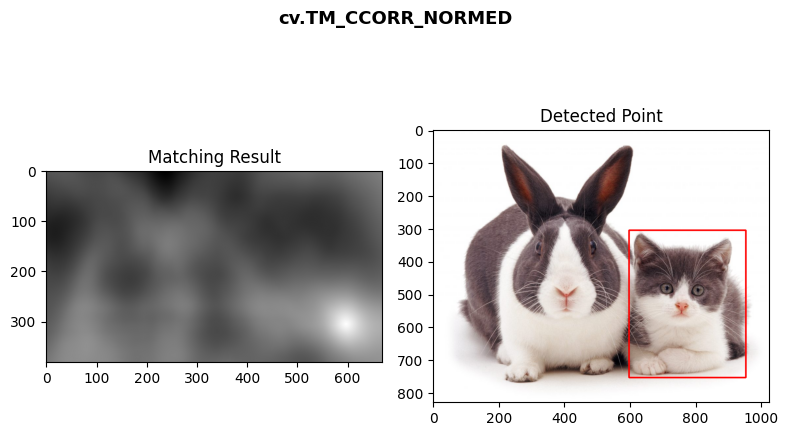

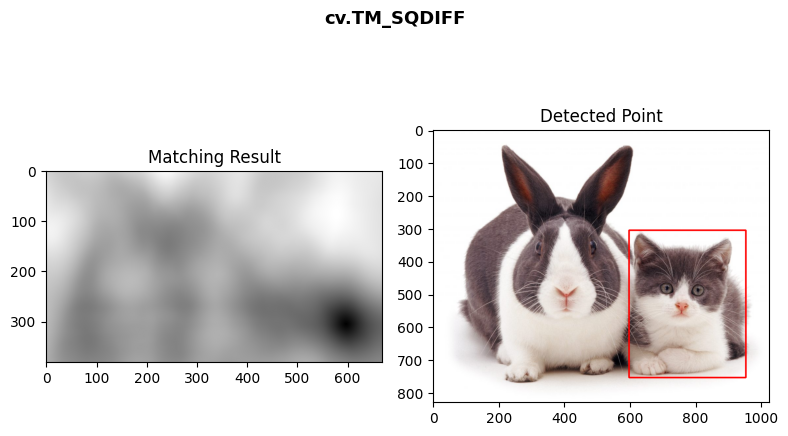

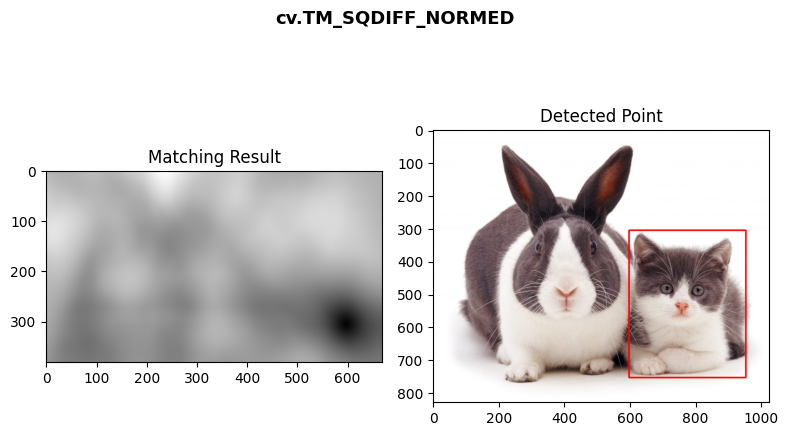

In [6]:
# === Baca gambar dan template ===
img = cv2.imread(img_path)
tpl = cv2.imread(tpl_path)
if img is None or tpl is None:
    raise FileNotFoundError("Pastikan kedua file ada dan bisa dibaca!")

# Konversi ke grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tpl_gray = cv2.cvtColor(tpl, cv2.COLOR_BGR2GRAY)
h, w = tpl_gray.shape[:2]

# --- tampilkan gambar input dan template di atas ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("input image")
plt.axis()

plt.subplot(1,2,2)
plt.imshow(tpl_gray, cmap='gray')
plt.title("template image")
plt.axis()
plt.show()

# --- daftar metode template matching (pakai tuple nama, metode) ---
methods = [
    ("cv.TM_CCOEFF", cv2.TM_CCOEFF),
    ("cv.TM_CCOEFF_NORMED", cv2.TM_CCOEFF_NORMED),
    ("cv.TM_CCORR", cv2.TM_CCORR),
    ("cv.TM_CCORR_NORMED", cv2.TM_CCORR_NORMED),
    ("cv.TM_SQDIFF", cv2.TM_SQDIFF),
    ("cv.TM_SQDIFF_NORMED", cv2.TM_SQDIFF_NORMED)
]

# --- proses tiap metode ---
for name, method in methods:
    result = cv2.matchTemplate(img_gray, tpl_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Lokasi hasil terbaik tergantung metode
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    detected_img = img.copy()
    cv2.rectangle(detected_img, top_left, bottom_right, (0,0,255), 3)

    # --- tampilkan hasil ---
    plt.figure(figsize=(8,5))
    plt.suptitle(name, fontsize=13, fontweight='bold')

    # Matching result (heatmap)
    plt.subplot(1,2,1)
    plt.imshow(cv2.normalize(result, None, 0, 1, cv2.NORM_MINMAX), cmap='gray')
    plt.title("Matching Result")
    plt.axis()

    # Detected point
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Point")
    plt.axis()

    plt.tight_layout()
    plt.show()

2. Template matching tanpa OpenCV (manual) untuk multiple object

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

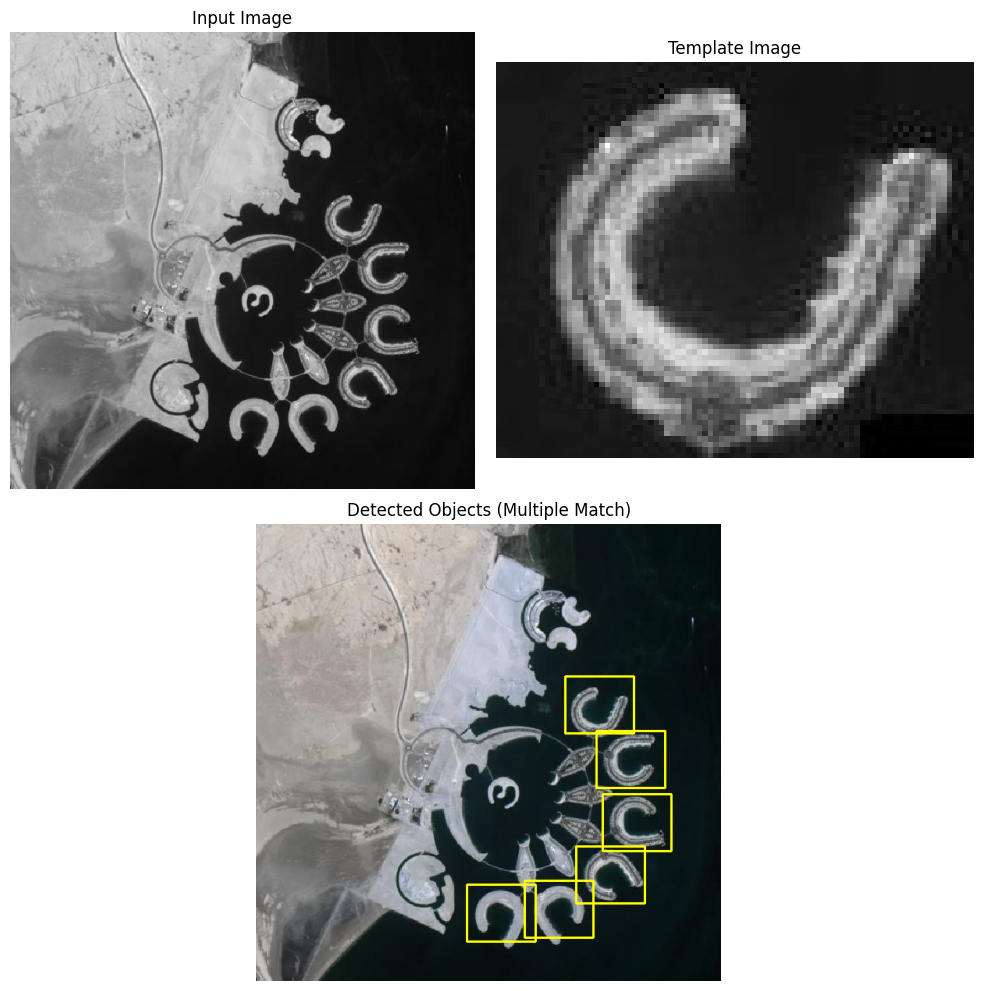

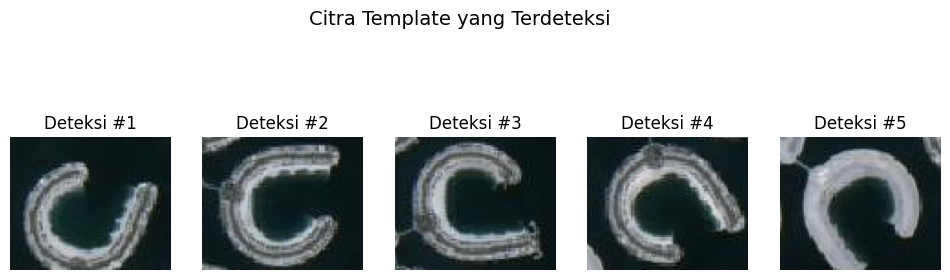

In [8]:
# 1. Baca citra dan template
img_path = BASE + "bahrain.jpg"
tpl_path = BASE + "bahrain-template.jpg"

img_rgb = cv.imread(img_path)
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread(tpl_path, 0)
h, w = template.shape

# 2. Normalisasi citra dan template
img_float = (img_gray - np.mean(img_gray)) / (np.std(img_gray) + 1e-6)
template_float = (template - np.mean(template)) / (np.std(template) + 1e-6)

# 3. Template Matching menggunakan Cross-Correlation 2D
corr = correlate2d(img_float, template_float, mode='valid')

# Normalisasi hasil korelasi agar rentang 0–1
corr_norm = (corr - np.min(corr)) / (np.max(corr) - np.min(corr))

# 4. Threshold dan Non-Maximum Suppression
threshold = 0.69
loc = np.where(corr_norm >= threshold)

detected_points = []
min_distance = int(min(h, w) * 0.5)   # jarak minimal antar deteksi

for (y, x) in zip(*loc):
    too_close = False
    for (py, px) in detected_points:
        if abs(x - px) < min_distance and abs(y - py) < min_distance:
            too_close = True
            break
    if not too_close:
        detected_points.append((y, x))

# 5. Gambar kotak deteksi pada citra asli
img_detect = img_rgb.copy()
for (y, x) in detected_points:
    cv.rectangle(img_detect, (x, y), (x + w, y + h), (0, 255, 255), 2)

# 6. Visualisasi hasil
plt.figure(figsize=(10, 10))

# Gambar input
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Template yang digunakan
plt.subplot(2, 2, 2)
plt.imshow(template, cmap='gray')
plt.title('Template Image')
plt.axis('off')

# Hasil deteksi objek
plt.subplot(2, 1, 2)
plt.imshow(cv.cvtColor(img_detect, cv.COLOR_BGR2RGB))
plt.title('Detected Objects (Multiple Match)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 7. Menampilkan potongan hasil deteksi (crop)
plt.figure(figsize=(12, 4))
for i, (y, x) in enumerate(detected_points[:5]):  # tampilkan 5 deteksi pertama
    crop = img_rgb[y:y+h, x:x+w]
    plt.subplot(1, 5, i+1)
    plt.imshow(cv.cvtColor(crop, cv.COLOR_BGR2RGB))
    plt.title(f'Deteksi #{i+1}')
    plt.axis('off')

plt.suptitle('Citra Template yang Terdeteksi', fontsize=14)
plt.show()

3. Sobel, Canny, Laplacian (gambar car-park.jpg)

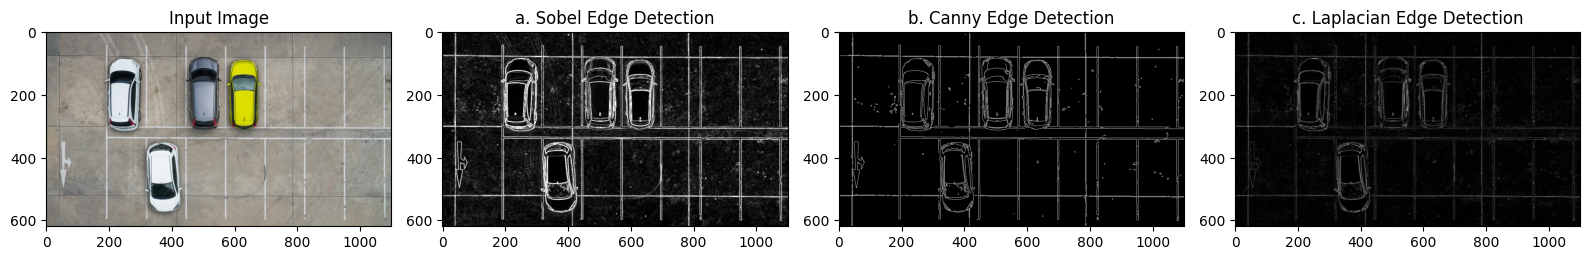

In [9]:
img = cv2.imread(BASE + "car-park.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === Sobel Edge Detection ===
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# === Canny Edge Detection ===
edges_canny = cv2.Canny(gray, 100, 200)

# === Laplacian Edge Detection ===
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# === Tampilkan hasil ===
plt.figure(figsize=(16, 6))

# Gambar asli
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

# Sobel
plt.subplot(1, 4, 2)
plt.imshow(sobel, cmap='gray')
plt.title('a. Sobel Edge Detection')

# Canny
plt.subplot(1, 4, 3)
plt.imshow(edges_canny, cmap='gray')
plt.title('b. Canny Edge Detection')

# Laplacian
plt.subplot(1, 4, 4)
plt.imshow(laplacian, cmap='gray')
plt.title('c. Laplacian Edge Detection')

plt.axis()
plt.tight_layout()
plt.show()

4. Harris Corner Detection dan Shi-Tomasi (gambar chessboard.jpg)

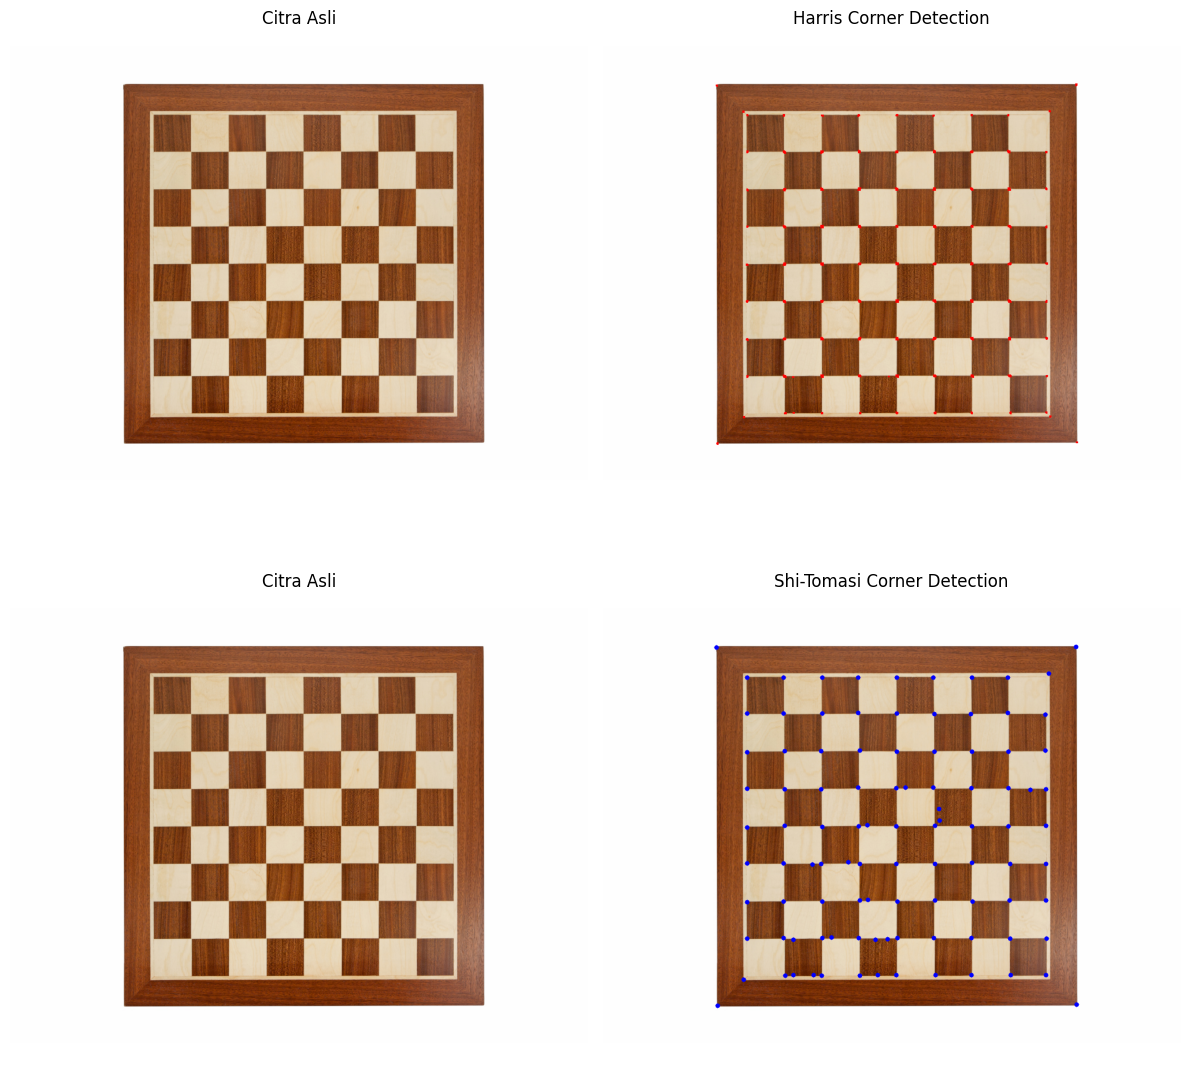

In [10]:
# 1. Membaca gambar dan ubah ke grayscale
img_path = BASE + "chess-board.jpg"
img = cv.imread(img_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 2. Harris Corner Detection
gray_float = np.float32(gray)
dst = cv.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
dst = cv.dilate(dst, None)

# Threshold untuk menandai titik corner
harris_img = img.copy()
harris_img[dst > 0.01 * dst.max()] = [0, 0, 255]  # warna merah

# 3. Shi-Tomasi Corner Detection
shi_img = img.copy()
corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(int)

for i in corners:
    x, y = i.ravel()
    cv.circle(shi_img, (x, y), 4, (255, 0, 0), -1)  # warna biru

# 4. Visualisasi hasil
plt.figure(figsize=(12, 12))

# --- Harris ---
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(harris_img, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# --- Shi-Tomasi ---
plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(shi_img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Hough Transform pada OpenCV dengan
menggunakan gambar sudoku.jpg

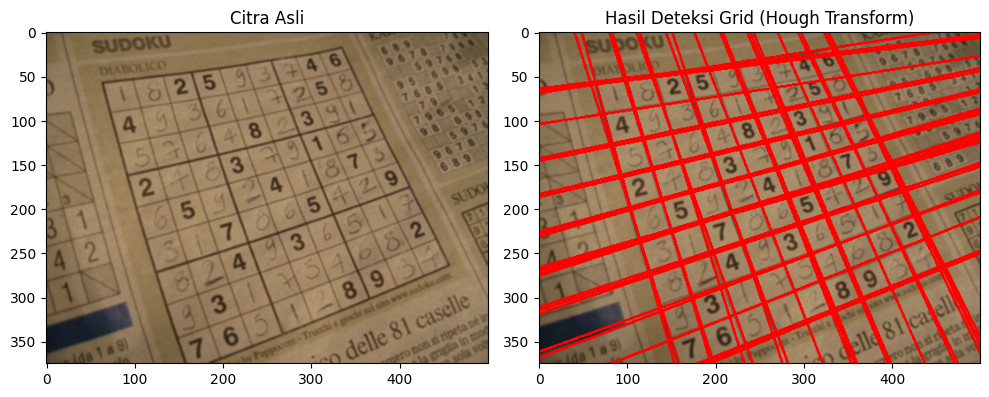

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca gambar dan konversi ke grayscale
img_path = BASE + "sudoku.jpg"
img = cv.imread(img_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 2. Pengurangan noise dengan Gaussian Blur
gray_blur = cv.GaussianBlur(gray, (5, 5), 1)

# 3. Deteksi tepi dengan Canny
edges = cv2.Canny(gray_blur, 45, 130, apertureSize=3)

# 4. Penerapan Hough Transform untuk mendeteksi garis
lines = cv.HoughLines(edges, rho=1, theta=np.pi/195, threshold=140)

# 5. Gambar hasil deteksi garis pada gambar asli
img_lines = img.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # warna merah

# 6. Visualisasi hasil
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_lines, cv.COLOR_BGR2RGB))
plt.title('Hasil Deteksi Grid (Hough Transform)')
plt.axis('on')

plt.tight_layout()
plt.show()


6. fungsi findContours() pada OpenCV untuk contour detection
dengan menggunakan gambar laptop.jpg

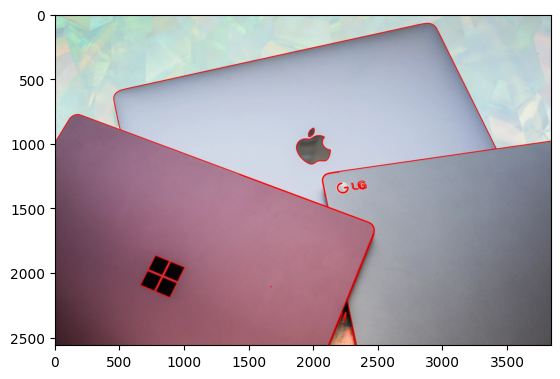

In [12]:
import cv2
import matplotlib.pyplot as plt

# 1. Baca gambar
img = cv2.imread(BASE + 'laptop.jpg')

# 2. Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Gunakan Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (7,7), 0)

# 4. Deteksi tepi menggunakan Canny
edges = cv2.Canny(blur, 10, 150)

# 5. Temukan kontur dari tepi yang terdeteksi
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 6. Gambar semua kontur pada gambar asli
cv2.drawContours(img, contours, -1, (0,0,255), 5)

# 7. Tampilkan hasil
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

D2. Praktikum Feature Matching dan Face Detection

In [13]:
BASE1 = "/content/drive/MyDrive/PCVK/Images/facedet/"

1. Lakukan Face Detection untuk image object lain yang tersedia pada
(/images/facedet).

In [14]:
img1 = cv2.imread(BASE1 + 'prabowo.jpg')
img2 = cv2.imread(BASE1 + 'kartini.jpg')
img3 = cv2.imread(BASE1 + 'kucing.jpg')
img4 = cv2.imread(BASE1 + 'mask.png')
img5 = cv2.imread(BASE1 + 'mjordan.jpg')
img6 = cv2.imread(BASE1 + 'solvayconf.jpg')

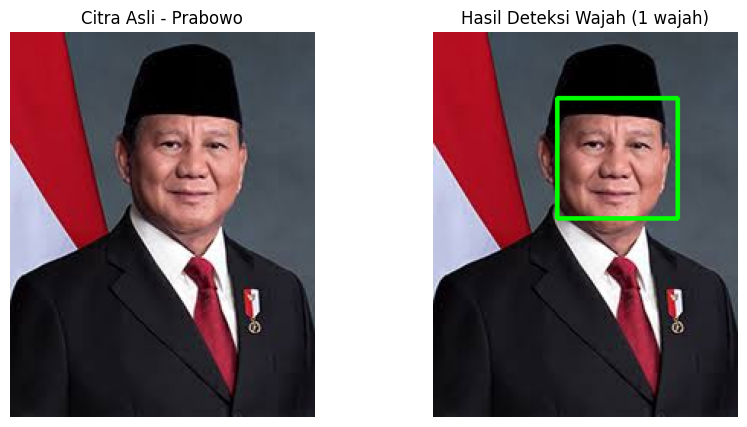

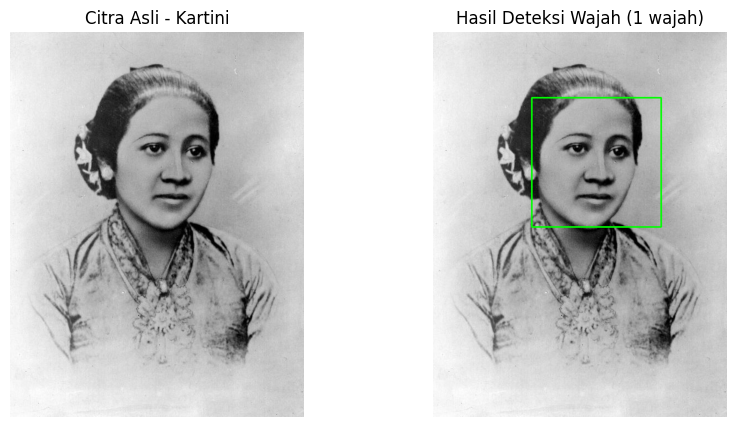

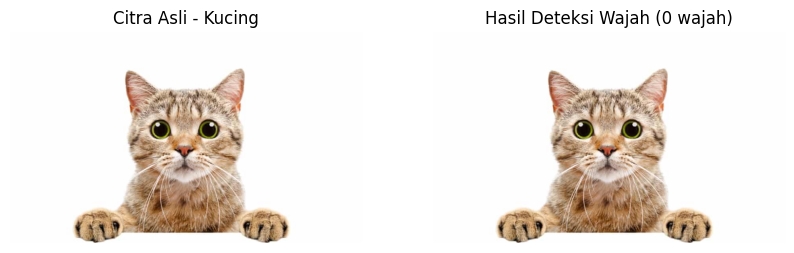

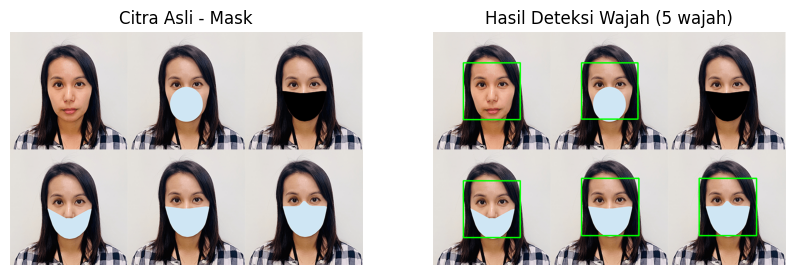

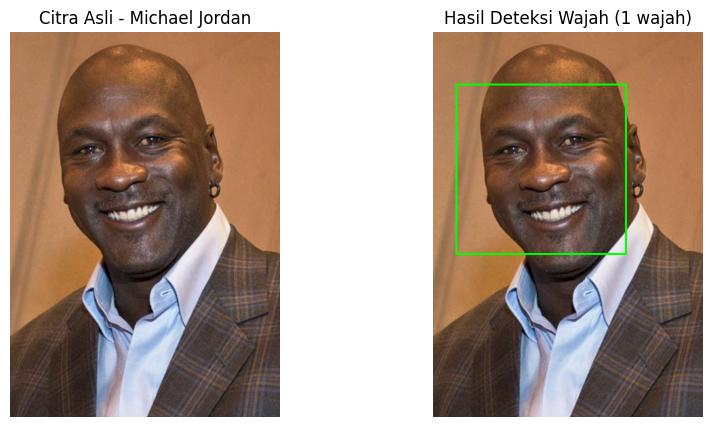

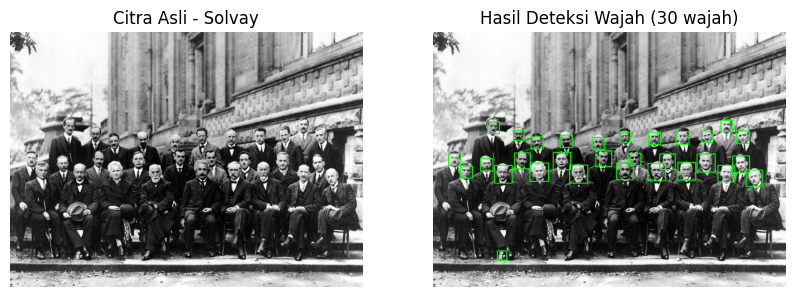

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Inisialisasi classifier ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# === 2. Fungsi bantu khusus untuk Solvay ===
def preprocess_face_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    gray = cv2.GaussianBlur(gray, (3,3), 0)
    return gray

def remove_overlaps(faces, threshold=0.4):
    if len(faces) == 0:
        return faces
    filtered = []
    for (x, y, w, h) in faces:
        keep = True
        for (x2, y2, w2, h2) in filtered:
            xx1, yy1 = max(x, x2), max(y, y2)
            xx2, yy2 = min(x+w, x2+w2), min(y+h, y2+h)
            inter_area = max(0, xx2-xx1) * max(0, yy2-yy1)
            union_area = w*h + w2*h2 - inter_area
            iou = inter_area / union_area if union_area > 0 else 0
            if iou > threshold:
                keep = False
                break
        if keep:
            filtered.append((x, y, w, h))
    return np.array(filtered)

def remove_false_faces(faces):
    filtered = []
    for (x, y, w, h) in faces:
        ratio = h / w
        if 0.8 < ratio < 1.5:
            filtered.append((x, y, w, h))
    return np.array(filtered)

# === 3. Fungsi utama: logika gabungan ===
def detect_face(img, mode='normal'):
    if mode == 'solvay':
        gray = preprocess_face_image(img)

        faces_main = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.08,
            minNeighbors=6,
            minSize=(40, 40)
        )

        faces_small = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.05,
            minNeighbors=5,
            minSize=(25, 25),
            maxSize=(60, 60)
        )

        if len(faces_main) and len(faces_small):
            all_faces = np.vstack((faces_main, faces_small))
        else:
            all_faces = faces_main if len(faces_main) else faces_small

        all_faces = remove_false_faces(all_faces)
        faces = remove_overlaps(all_faces, threshold=0.35)

    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.2,
            minNeighbors=6,
            minSize=(60, 60)
        )

    # gambar hasil
    img_detected = img.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(img_detected, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_detected, len(faces)

# === 4. Menampilkan hasil ===
filenames = ['prabowo.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']
titles = ['Prabowo', 'Kartini', 'Kucing', 'Mask', 'Michael Jordan', 'Solvay']

for i, name in enumerate(filenames):
    path = BASE1 + name
    img = cv2.imread(path)
    if img is None:
        print(f"File tidak ditemukan: {path}")
        continue

    mode = 'solvay' if 'solvay' in name.lower() else 'normal'
    detected, count = detect_face(img.copy(), mode)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Citra Asli - {titles[i]}')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
    plt.title(f'Hasil Deteksi Wajah ({count} wajah)')
    plt.axis('off')

    plt.show()


2. Lakukan deteksi
wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal
ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml
yang ada jika memang telah disediakan.

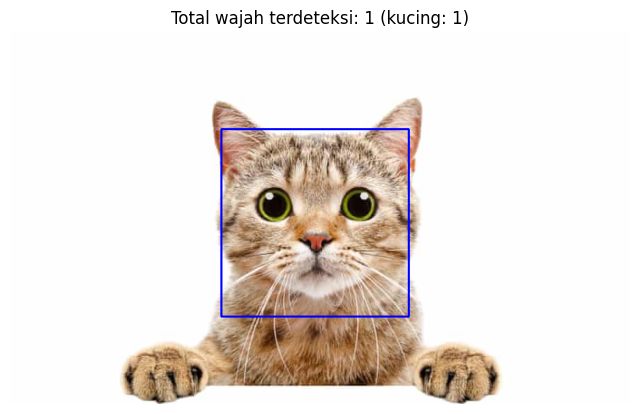

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Load cascade manusia & kucing ===
human_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cat_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface_extended.xml')

def non_max_suppression(boxes, overlapThresh=0.3):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []
    x1, y1, w, h = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]
    x2 = x1 + w
    y2 = y1 + h

    area = (w + 1) * (h + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w_ = np.maximum(0, xx2 - xx1 + 1)
        h_ = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w_ * h_) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def detect_faces_and_cats(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    humans = human_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(60,60)
    )
    cats = cat_cascade.detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=7, minSize=(50,50)
    )

    # Hilangkan duplikat deteksi
    cats_nms = non_max_suppression(cats, overlapThresh=0.4)

    img_out = img.copy()
    for (x, y, w, h) in humans:
        cv2.rectangle(img_out, (x, y), (x+w, y+h), (0, 255, 0), 2)
    for (x, y, w, h) in cats_nms:
        cv2.rectangle(img_out, (x, y), (x+w, y+h), (255, 0, 0), 2)

    total = len(humans) + len(cats_nms)
    return img_out, total, len(cats_nms)

# === Coba ===
path = BASE1 + 'kucing.jpg'
img = cv2.imread(path)
detected, total, cats = detect_faces_and_cats(img)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
plt.title(f"Total wajah terdeteksi: {total} (kucing: {cats})")
plt.axis("off")
plt.show()


3. Cobakan juga untuk eyes detection pada wajah Pak Prabowo.

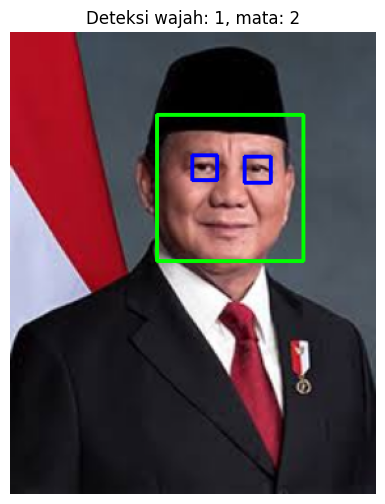

In [17]:
import cv2
import matplotlib.pyplot as plt

# === Load pretrained classifier ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade1 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
eye_cascade2 = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

def detect_face_and_eyes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # --- Deteksi wajah ---
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.08,
        minNeighbors=4,
        minSize=(70, 70)
    )

    img_detected = img.copy()
    total_eyes = 0

    for (x, y, w, h) in faces:
        cv2.rectangle(img_detected, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Ambil area wajah bagian atas (25–60% dari tinggi wajah)
        y1 = int(y + h * 0.25)
        y2 = int(y + h * 0.60)
        roi_gray = gray[y1:y2, x:x+w]
        roi_color = img_detected[y1:y2, x:x+w]

        # Sedikit pertajam citra agar mata lebih jelas
        roi_gray = cv2.equalizeHist(roi_gray)
        roi_gray = cv2.bilateralFilter(roi_gray, 5, 75, 75)

        # Resize ROI ke ukuran lebih besar agar classifier sensitif
        roi_resized = cv2.resize(roi_gray, (300, int(roi_gray.shape[0] * 300 / roi_gray.shape[1])))

        # --- Deteksi mata pakai dua model dengan parameter lebih longgar ---
        eyes1 = eye_cascade1.detectMultiScale(
            roi_resized,
            scaleFactor=1.03,
            minNeighbors=2,
            minSize=(15, 15),
            maxSize=(100, 100)
        )
        eyes2 = eye_cascade2.detectMultiScale(
            roi_resized,
            scaleFactor=1.03,
            minNeighbors=2,
            minSize=(15, 15),
            maxSize=(100, 100)
        )

        eyes = eyes1 if len(eyes1) > 0 else eyes2
        total_eyes += len(eyes)

        # Gambar kotak mata
        scale_x = roi_color.shape[1] / roi_resized.shape[1]
        scale_y = roi_color.shape[0] / roi_resized.shape[0]
        for (ex, ey, ew, eh) in eyes:
            ex = int(ex * scale_x)
            ey = int(ey * scale_y)
            ew = int(ew * scale_x)
            eh = int(eh * scale_y)
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 2)

    return img_detected, len(faces), total_eyes


# === Jalankan deteksi pada Prabowo ===
path = BASE1 + 'prabowo.jpg'
img = cv2.imread(path)
img = cv2.resize(img, (0,0), fx=1.4, fy=1.4)  # sedikit diperbesar agar mata lebih jelas

if img is not None:
    result, face_count, eye_count = detect_face_and_eyes(img)
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Deteksi wajah: {face_count}, mata: {eye_count}")
    plt.axis('off')
    plt.show()


4.  Lakukan deteksi senyuman pada gambar people.

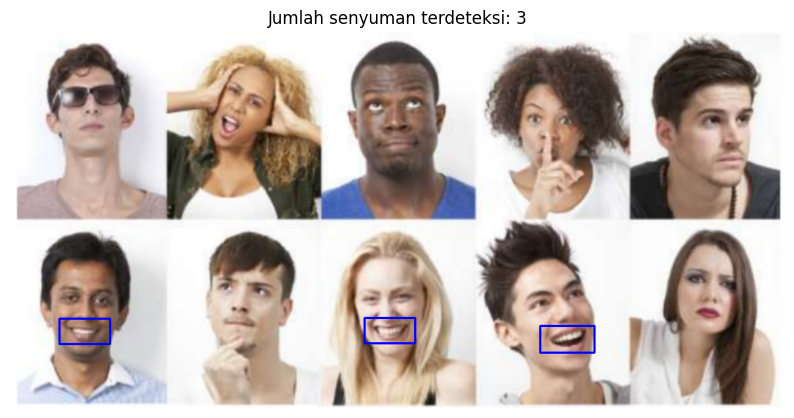

In [18]:
import cv2
import matplotlib.pyplot as plt

# === Load pretrained Haar Cascade ===
face_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

def detect_smiles(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    # Deteksi wajah (hanya untuk menentukan area ROI)
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(60, 60)
    )

    img_detected = img.copy()
    total_smiles = 0

    for (x, y, w, h) in faces:
        # Ambil area bawah wajah (tempat mulut biasanya)
        roi_gray = gray[y+int(h*0.5):y+h, x:x+w]
        roi_color = img_detected[y+int(h*0.5):y+h, x:x+w]

        # Deteksi senyum di area bawah wajah
        smiles = smile_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.2,
            minNeighbors=8,
            minSize=(25, 25)
        )

        total_smiles += len(smiles)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (255, 0, 0), 2)

    return img_detected, total_smiles


# === Jalankan pada gambar people ===
path = BASE1 + 'people.png'
img = cv2.imread(path)

if img is not None:
    img = cv2.resize(img, (0,0), fx=1.3, fy=1.3)
    result, smile_count = detect_smiles(img)

    plt.figure(figsize=(10,6))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"Jumlah senyuman terdeteksi: {smile_count}")
    plt.axis('off')
    plt.show()


5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial
selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat
dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [19]:
!pip install opencv-python
!pip install opencv-python-headless

In [20]:
from IPython.display import Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io

# === Fungsi ambil foto dari webcam (tanpa kamera ganda) ===
def take_photo(filename='photo.jpg', quality=0.8):
    js = '''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Ambil Foto';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Tunggu tombol ditekan
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      video.remove();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    takePhoto(%f);
    ''' % quality

    data = eval_js(js)  # hanya sekali panggil di sini!
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [22]:
filename = take_photo()
print("Foto tersimpan sebagai:", filename)

Foto tersimpan sebagai: photo.jpg


6. Lakukan Blurring pada bagian wajah yang terdeteksi.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

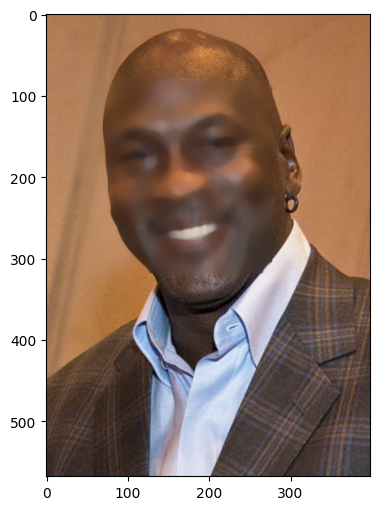

In [23]:
import cv2
import matplotlib.pyplot as plt

# === Load pretrained Haar Cascade untuk deteksi wajah ===
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

# === Baca gambar MJ ===
path = BASE1 + 'mjordan.jpg'
img = cv2.imread(path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === Deteksi wajah ===
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(80, 80)
)

# === Blur tiap wajah yang terdeteksi ===
img_blurred = img.copy()
for (x, y, w, h) in faces:
    # Ambil area wajah
    face_roi = img_blurred[y:y+h, x:x+w]
    # Terapkan median blur — kernel lebih besar = lebih buram
    face_blur = cv2.medianBlur(face_roi, 15)
    # Tempel hasil blur ke gambar utama
    img_blurred[y:y+h, x:x+w] = face_blur

# === Tampilkan hasil ===
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()


7. Mengolah gambar KTM masing-masing

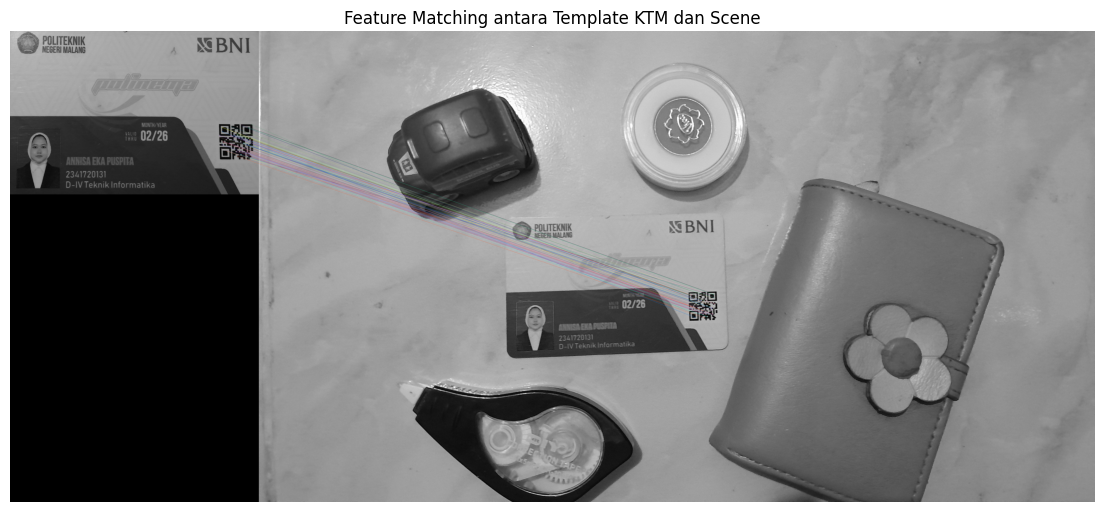

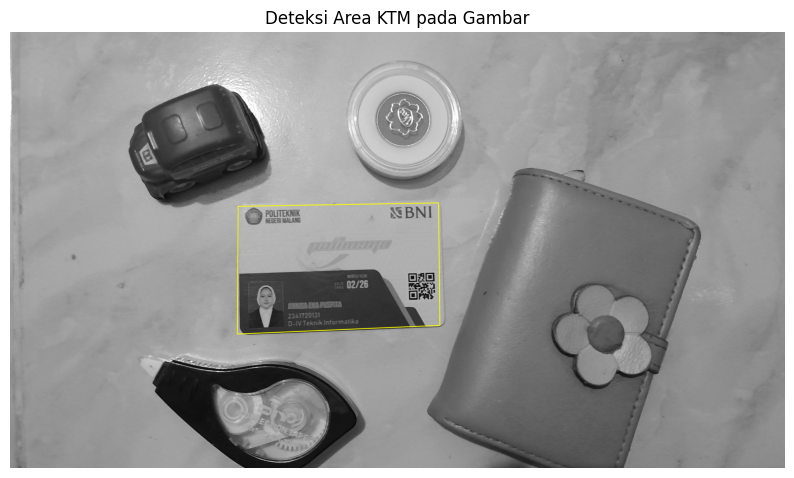

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load gambar template (KTM) dan scene (gambar berisi KTM + benda lain) ===
path_ktm = BASE1 + 'ktm.jpg'       # Gambar KTM acuan
path_scene = BASE1 + 'ktm_dan_barang.jpg'   # Gambar berisi KTM + benda lain

img_ktm = cv2.imread(path_ktm, cv2.IMREAD_GRAYSCALE)
img_scene = cv2.imread(path_scene, cv2.IMREAD_GRAYSCALE)

# === 2. Deteksi keypoints & descriptor dengan ORB ===
orb = cv2.ORB_create(nfeatures=1500)
kp1, des1 = orb.detectAndCompute(img_ktm, None)
kp2, des2 = orb.detectAndCompute(img_scene, None)

# === 3. Pastikan descriptor tidak None ===
if des1 is None or des2 is None:
    print("Gagal mendeteksi fitur pada salah satu gambar. Periksa kontras atau fokus gambar.")
else:
    # === 4. Feature Matching ===
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Urutkan berdasarkan jarak (semakin kecil = semakin mirip)
    matches = sorted(matches, key=lambda x: x.distance)

    # === 5. Gambar hasil match terbaik ===
    img_match = cv2.drawMatches(
        img_ktm, kp1, img_scene, kp2,
        matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(14,7))
    plt.imshow(img_match, cmap='gray')
    plt.title('Feature Matching antara Template KTM dan Scene')
    plt.axis('off')
    plt.show()

    # === 6. Estimasi lokasi KTM di gambar scene ===
    if len(matches) > 10:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        if M is not None:
            h, w = img_ktm.shape
            pts = np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
            dst = cv2.perspectiveTransform(pts, M)

            img_detected = cv2.cvtColor(img_scene, cv2.COLOR_GRAY2BGR)
            cv2.polylines(img_detected, [np.int32(dst)], True, (0,255,255), 8)

            plt.figure(figsize=(10,6))
            plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
            plt.title('Deteksi Area KTM pada Gambar')
            plt.axis('off')
            plt.show()
        else:
            print("Tidak cukup data untuk membentuk homografi.")
    else:
        print("Terlalu sedikit fitur yang cocok untuk mendeteksi KTM.")


**Tambahan Tugas Praktikum:**

Tampilkan karakter-karakter pada KTM ini Deep Learning untuk melakukan
pengenalan karakter. Sebelum melakukan training data, terlebih dahulu di
siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9.
Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping
satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk
proses persiapan untuk training.

In [25]:
# Cek versi Python dan GPU
!python --version
!nvidia-smi

# Install library yang diperlukan
!pip install tqdm opencv-python-headless tensorflow keras

Python 3.12.12
/bin/bash: line 1: nvidia-smi: command not found


In [52]:
import os
import cv2
import pickle
import random
import numpy as np
import tqdm
from collections import Counter
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Persiapan data training

In [53]:
DATADIR = "/content/drive/MyDrive/PCVK/Images/training"

training_data = []
width, height = 100, 100

dirs = sorted([d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))])
print("Karakter ditemukan:", dirs)

for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img_name in tqdm.tqdm(os.listdir(path), desc=f"Loading {char_name}"):
        try:
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                continue
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            print(f"Error pada {img_name}: {e}")
            continue

# Acak data biar model tidak bias
random.shuffle(training_data)

X, Y = [], []
for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)
Y = np.array(Y)

Karakter ditemukan: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Loading 4: 100%|██████████| 1/1 [00:00<00:00, 138.49it/s]
Loading 5: 0it [00:00, ?it/s]
Loading 7: 100%|██████████| 1/1 [00:00<00:00, 170.83it/s]
Loading 8: 0it [00:00, ?it/s]
Loading 9: 0it [00:00, ?it/s]


Simpan data pickle

In [54]:
with open("X.pickle", "wb") as f:
    pickle.dump(X, f)

with open("Y.pickle", "wb") as f:
    pickle.dump(Y, f)

print(" Data berhasil disimpan ke pickle.")

 Data berhasil disimpan ke pickle.


Load ulang data

In [55]:
with open("X.pickle", "rb") as f:
    X = pickle.load(f)

with open("Y.pickle", "rb") as f:
    Y = pickle.load(f)

print("\n=== INFORMASI DATASET ===")
print(f"Shape X: {X.shape}")
print(f"Jumlah sampel: {len(Y)}")
print(f"Label unik yang terdeteksi: {np.unique(Y)}")

# Tampilkan jumlah gambar per label
label_counts = Counter(Y)
for label in np.unique(Y):
    print(f"Jumlah data untuk label {label}: {label_counts[label]}")


=== INFORMASI DATASET ===
Shape X: (14, 100, 100, 1)
Jumlah sampel: 14
Label unik yang terdeteksi: [0 1 2 3 4 6 7]
Jumlah data untuk label 0: 2
Jumlah data untuk label 1: 3
Jumlah data untuk label 2: 4
Jumlah data untuk label 3: 2
Jumlah data untuk label 4: 1
Jumlah data untuk label 6: 1
Jumlah data untuk label 7: 1


Tentukan jumlah kelas sesuai dataset

In [56]:
num_classes = 10

print(f"\nJumlah kelas yang digunakan: {num_classes}")

# Normalisasi & One-hot encoding
X = X / 255.0
Y = to_categorical(Y, num_classes=num_classes)


Jumlah kelas yang digunakan: 10


Bangun model CNN

In [57]:
inputs = Input(shape=(width, height, 1))

x = ZeroPadding2D(padding=(2, 2))(inputs)
x = Conv2D(16, (5, 5), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Latih dan simpan model

In [58]:
model.fit(X, Y, epochs=20, verbose=1) #latih

model.save("anpr.keras") #simpan
print("\n Model berhasil disimpan sebagai 'anpr.keras'")

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.3332
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.3571 - loss: 2.2254
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.2857 - loss: 2.1440
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2857 - loss: 2.0633
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step - accuracy: 0.2857 - loss: 1.9878
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.2857 - loss: 1.9117
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step - accuracy: 0.2857 - loss: 1.8311
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.2857 - loss: 1.7516
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.4286 - loss: 1.6740
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step - accuracy: 0.5714 - loss: 1.5934
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.5714 - loss: 1.5142
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step - accuracy: 0.7143 - l

Testing (Uji pengenalan karakter)

In [60]:
data_dir_training = DATADIR
data_dir_testing = "/content/drive/MyDrive/PCVK/Images/testing"

model = tf.keras.models.load_model("anpr.keras")
dirs = sorted([d for d in os.listdir(data_dir_training) if os.path.isdir(os.path.join(data_dir_training, d))])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X)
model.fit(datagen.flow(X, Y, batch_size=8), epochs=30)

for car in sorted(os.listdir(data_dir_testing)):
    temp = ""
    folder_path = os.path.join(data_dir_testing, car)
    if not os.path.isdir(folder_path):
        continue

    for char_img in sorted(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, char_img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img_array is None:
            continue
        new_array = cv2.resize(img_array, (width, height))
        new_array = new_array.reshape(-1, width, height, 1) / 255.0

        prediction = model.predict(new_array, verbose=0)
        pred_index = np.argmax(prediction[0])
        temp += dirs[pred_index]

    print(f"Folder: {car} → Hasil Prediksi: {temp}")


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.5476 - loss: 1.3949
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6984 - loss: 1.0518
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.4921 - loss: 1.1209
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7460 - loss: 1.0599
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5952 - loss: 1.0900
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.6369 - loss: 0.8158
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.8155 - loss: 0.6612
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.8492 - loss: 0.7032
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.6905 - loss: 0.6584
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.5556 - loss: 1.0996
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8016 - loss: 0.7011
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step - accuracy: 0.8492 - lo